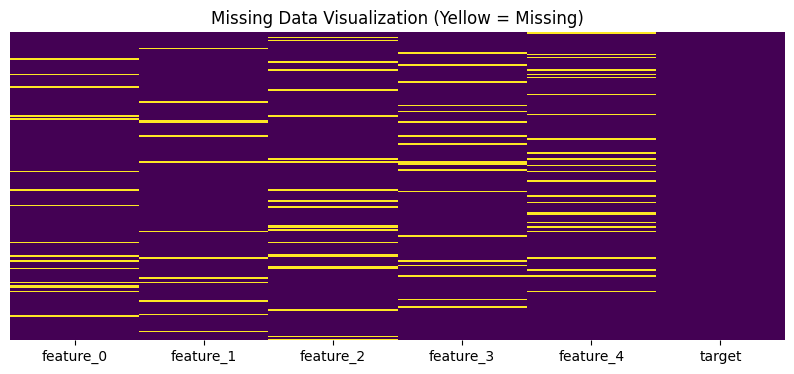

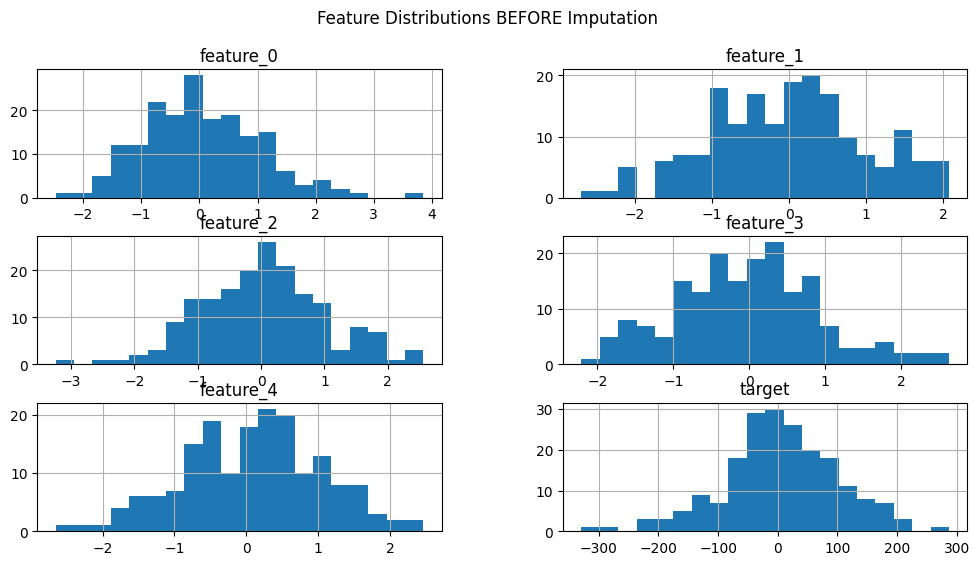

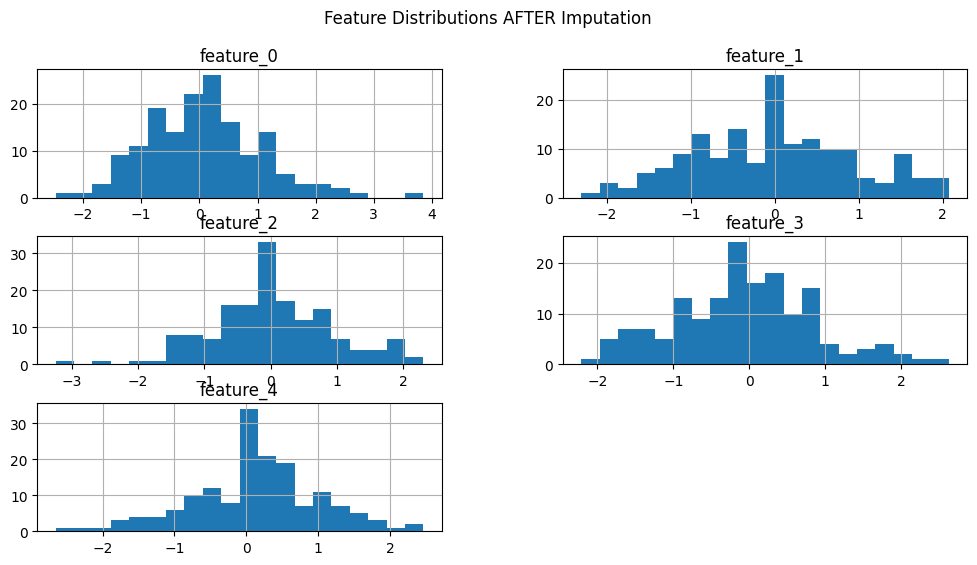

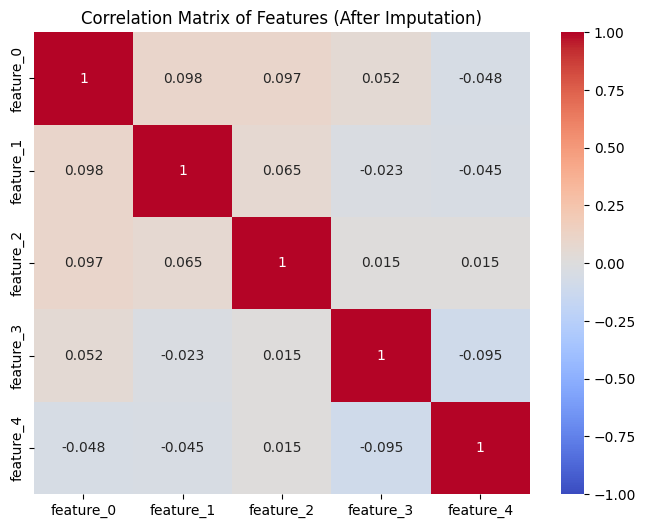

Mean Squared Error on Test Set: 1011.58


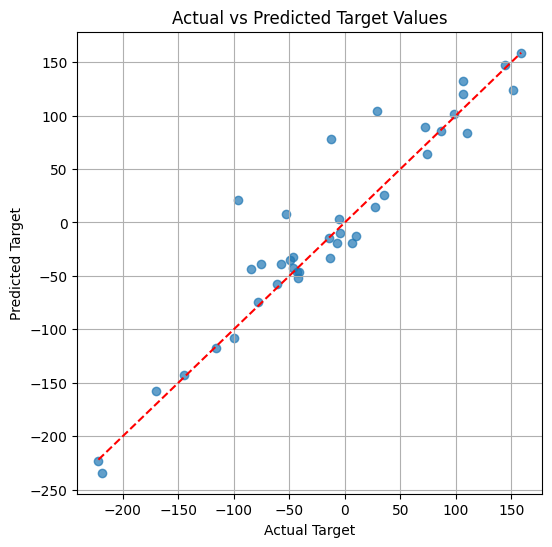

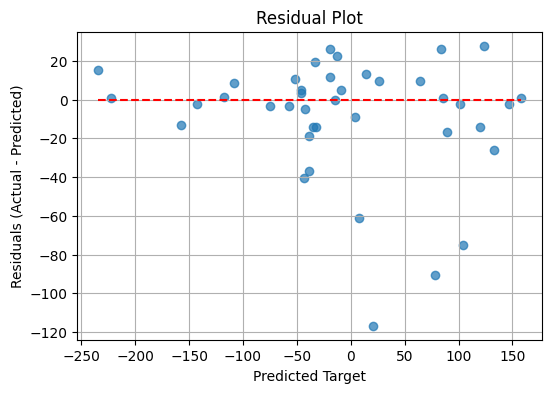

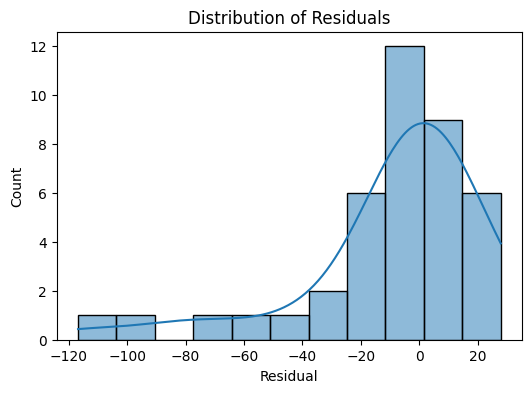

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# 1. Generate synthetic regression data
X, y = make_regression(n_samples=200, n_features=5, noise=15, random_state=42)

# 2. Introduce some missing values (NaNs) randomly in X
rng = np.random.default_rng(seed=42)
missing_mask = rng.choice([True, False], size=X.shape, p=[0.1, 0.9])
X[missing_mask] = np.nan

# Convert to DataFrame for easier visualization
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
df['target'] = y

# --- VISUALIZATION 1: Missing Data Heatmap ---
plt.figure(figsize=(10, 4))
sns.heatmap(df.isna(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Missing Data Visualization (Yellow = Missing)")
plt.show()

# --- VISUALIZATION 2: Histograms Before Imputation ---
df.hist(bins=20, figsize=(12,6))
plt.suptitle("Feature Distributions BEFORE Imputation")
plt.show()

# 3. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='target'), df['target'],
                                                    test_size=0.2, random_state=42)

# 4. Impute missing values on training and test sets separately
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Convert back to DataFrame for visualization
X_train_imputed_df = pd.DataFrame(X_train_imputed, columns=X_train.columns)

# --- VISUALIZATION 3: Histograms After Imputation ---
X_train_imputed_df.hist(bins=20, figsize=(12,6))
plt.suptitle("Feature Distributions AFTER Imputation")
plt.show()

# --- VISUALIZATION 4: Correlation Heatmap ---
plt.figure(figsize=(8,6))
corr = X_train_imputed_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Features (After Imputation)")
plt.show()

# 5. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# 6. Train linear regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 7. Predict
y_pred = model.predict(X_test_scaled)

# 8. Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse:.2f}")

# --- VISUALIZATION 5: Actual vs Predicted ---
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Target")
plt.ylabel("Predicted Target")
plt.title("Actual vs Predicted Target Values")
plt.grid(True)
plt.show()

# --- VISUALIZATION 6: Residual Plot ---
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.hlines(0, xmin=y_pred.min(), xmax=y_pred.max(), colors='r', linestyles='dashed')
plt.xlabel("Predicted Target")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.grid(True)
plt.show()

# --- VISUALIZATION 7: Distribution of Residuals ---
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residual")
plt.show()
